In [29]:
import numpy
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data.dataloader as dataloader
import torch.optim as optim
import torchvision 

from torch.utils.data import TensorDataset
from torch.autograd import Variable
from torchvision import transforms
from torchvision.transforms import *
import matplotlib.pyplot as plt

SEED = 1

# CUDA?
cuda = torch.cuda.is_available()

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

161
41
['Paper', 'Rock', 'Scissors']
202
torch.Size([1, 32, 32])
0


/opt/miniconda/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


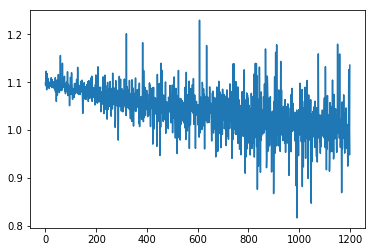

In [30]:
transformations = transforms.Compose([transforms.Resize((32,32)),transforms.Grayscale(),transforms.RandomVerticalFlip(p=0.5), transforms.RandomRotation(45),transforms.ToTensor(),])

#Download the dataset
imagenet_data = torchvision.datasets.ImageFolder('./img',transform=transformations) 
train_size = int(0.8 * len(imagenet_data))
test_size = len(imagenet_data) - train_size
train_data, test_data = torch.utils.data.random_split(imagenet_data, [train_size, test_size])

print(train_data)
print(train_size)
print(test_size)

#Create DataLoader

data_loader = dict(shuffle=True, batch_size=50,num_workers=4, pin_memory=True) 
train_loader = dataloader.DataLoader(train_data, **data_loader)
test_loader = dataloader.DataLoader(test_data, **data_loader)

print(imagenet_data.classes)
image, label = imagenet_data[0]
print(len(imagenet_data))
print(image.size())
print(label)


class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.f1 = nn.Linear(32*32, 16*16)
        self.f2 = nn.Linear(16*16, 3)

    def forward(self, x):
        out1 = F.relu(self.f1(x.view(-1,32*32)))
        out2 = self.f2(out1)
        return F.softmax(out2)
    
model = Model()
if cuda:
    model.cuda()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

EPOCHS=300
losses = []
model.train()
for epoch in range(EPOCHS):
    for batch_idx, (data, label) in enumerate(train_loader):
        data, target = Variable(data), Variable(label)
        #print(images.shape)
        optimizer.zero_grad()
       # print(labels)
        y_pred = model(data) 
        loss = F.cross_entropy(y_pred, label)
        loss.backward()
        optimizer.step()
        losses.append(loss.cpu().item())

plt.plot(losses)
#rajouter des flips et des epochs

In [32]:
dataiter = iter(test_loader)
image, label = dataiter.next()
model.eval()
output = model(image)
pred = output.data.max(1)[1]
d = pred.eq(label.data).cpu()
accuracy = d.sum().item()/d.size()[0]
print(accuracy)

0.3170731707317073


/opt/miniconda/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
